<a href="https://colab.research.google.com/github/Vsevolod245/CV_MAI_2023/blob/main/HW1_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks.txt

Задание 1: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

Задание 2: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

Задание 3: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).


---



In [127]:
import sys
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np
from PIL import Image

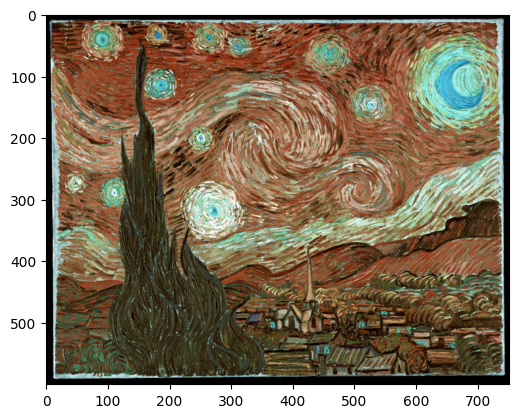

In [128]:
# загружаем картинку
req = urlopen('https://i.imgur.com/oFNSSJC.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_BGR = cv2.imdecode(arr, -1)
plt.imshow(img_BGR)



---


Задание 1

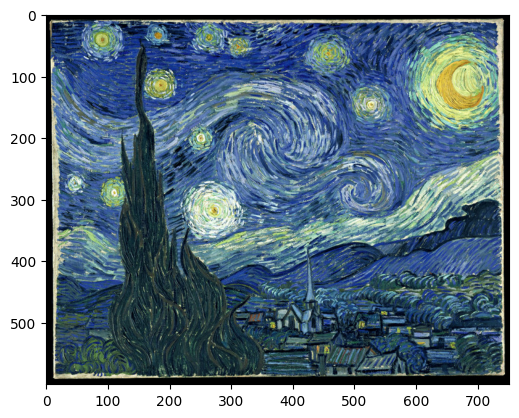

In [129]:
# BGR -> RGB аналог библиотечной
B, G, R = cv2.split(img_BGR)
img_RGB = cv2.merge([R,G,B])
plt.imshow(img_RGB)

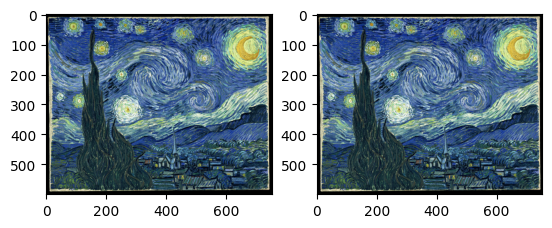

In [130]:
# Проверка BGR -> RGB
img_RGB_lib = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img_RGB)
plt.subplot(1, 2, 2)
plt.imshow(img_RGB_lib)



---


Задание 2

In [131]:
img_RGB.shape

(600, 752, 3)

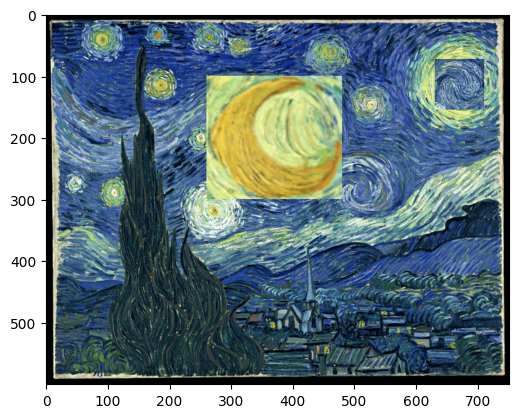

In [132]:
Spiral = img_RGB[100:300, 260:480, :]
Moon = img_RGB[73:155, 630:710, :]
img_Swap = img_RGB.copy()
img_Swap[100:300, 260:480, :] = cv2.resize(Moon, [480-260,300-100])
img_Swap[73:155, 630:710, :] = cv2.resize(Spiral, [710-630,155-73])
plt.imshow(img_Swap)



---


Задание 3

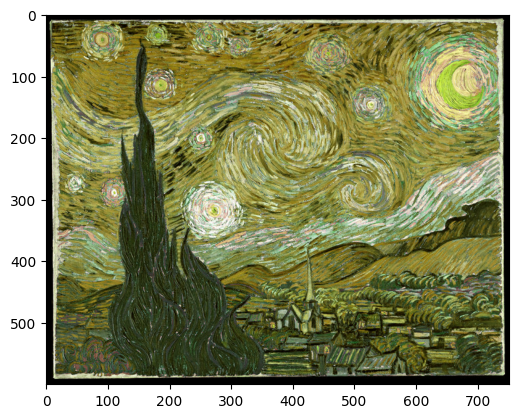

In [173]:
img_HSV = cv2.cvtColor(img_RGB,cv2.COLOR_RGB2HSV)
# Крутим
H, S, V = cv2.split(img_HSV)
for i in range(0,H.shape[0]):
  H[i] = 317 - H[i]
img_Day = cv2.merge([H,S,V])
img_Day = cv2.cvtColor(img_Day, cv2.COLOR_HSV2RGB)
plt.imshow(img_Day)